## Evaluating the classifiers.

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
import csv
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor

In [3]:
df=pd.read_csv('new-thyroid.csv', header=None)

column_names = ['Diagnosis', 'T3RU', 'T4', 'T3', 'TSH', 'DTSH']
df.columns = column_names

df.head()

,Diagnosis,T3RU,T4,T3,TSH,DTSH
0,1,107,10.1,2.2,0.9,2.7
1,1,113,9.9,3.1,2.0,5.9
2,1,127,12.9,2.4,1.4,0.6
3,1,109,5.3,1.6,1.4,1.5
4,1,105,7.3,1.5,1.5,-0.1


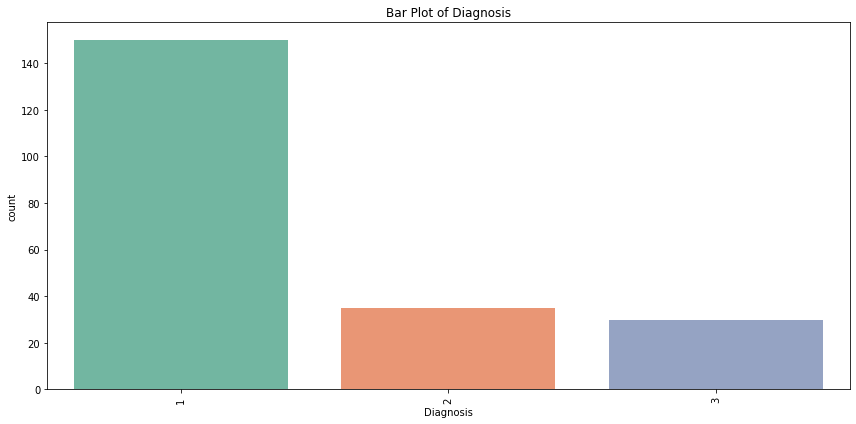

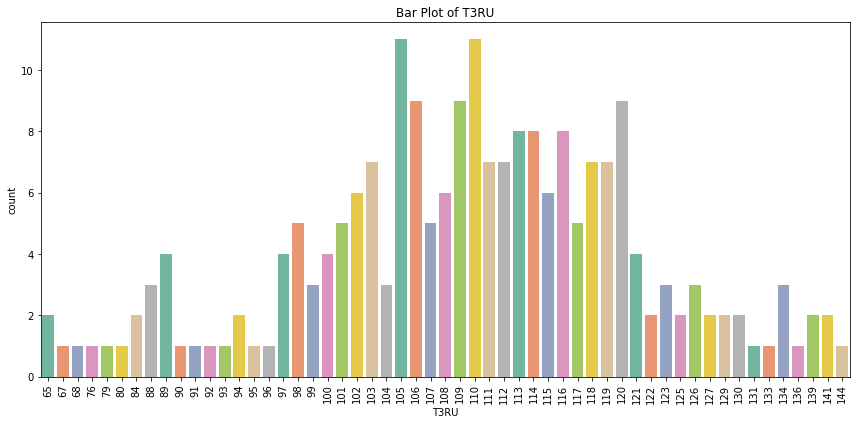

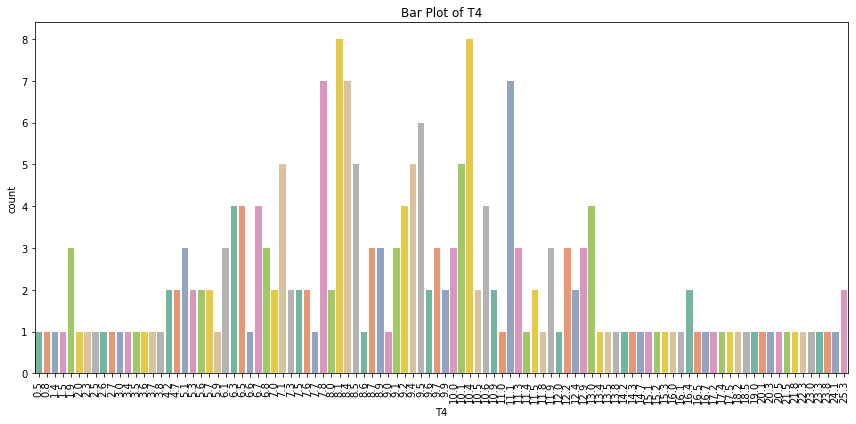

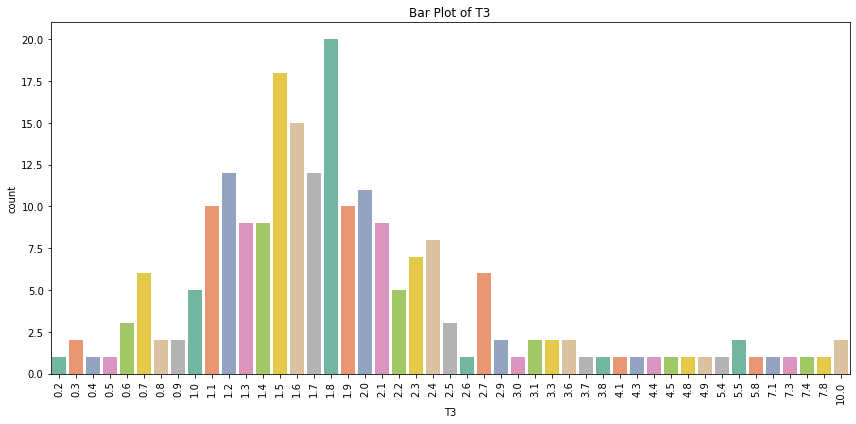

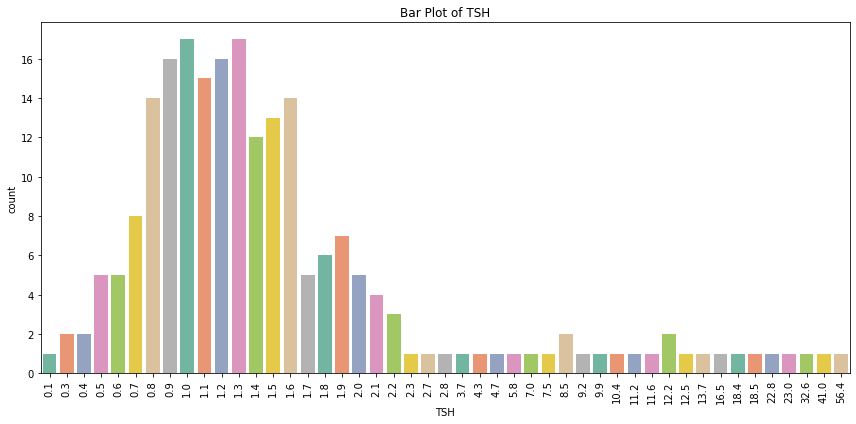

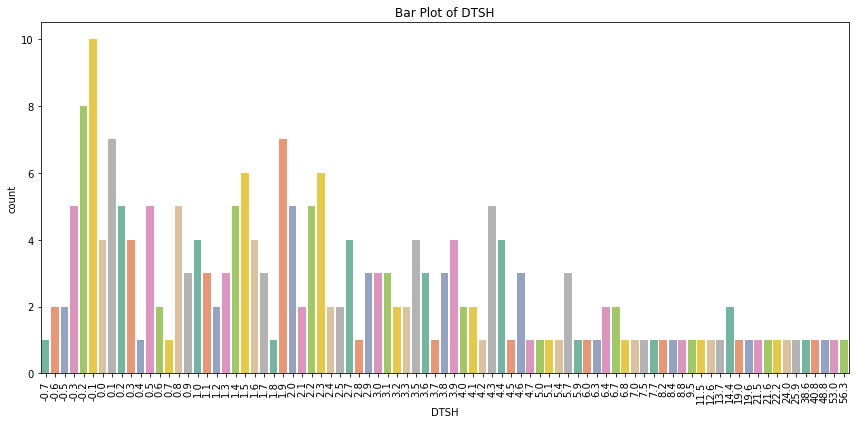

In [5]:
for column in df.columns:
    plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
    sns.countplot(data=df, x=column, palette="Set2")  # Using Seaborn for countplot
    plt.title(f"Bar Plot of {column}")
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
    plt.tight_layout()  # Ensure the plots don't overlap
    plt.show()

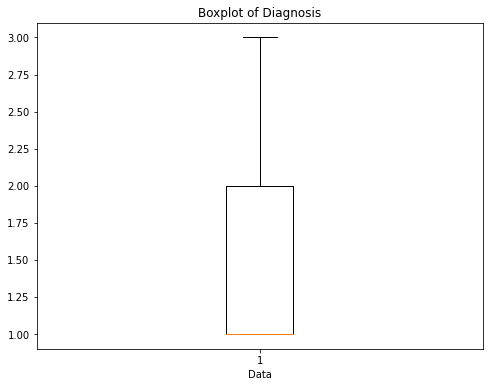

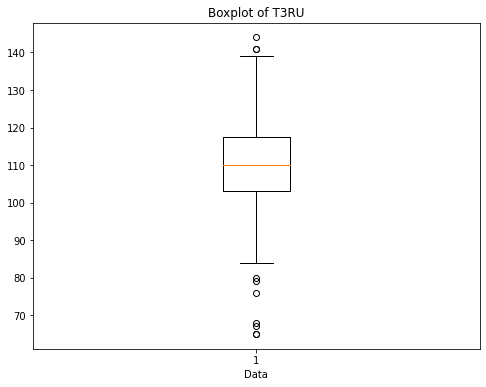

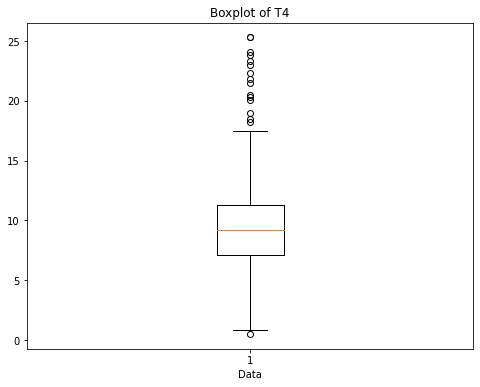

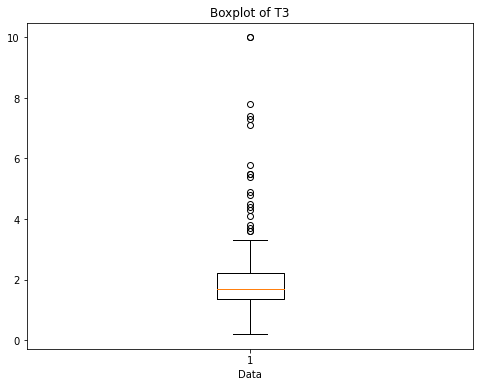

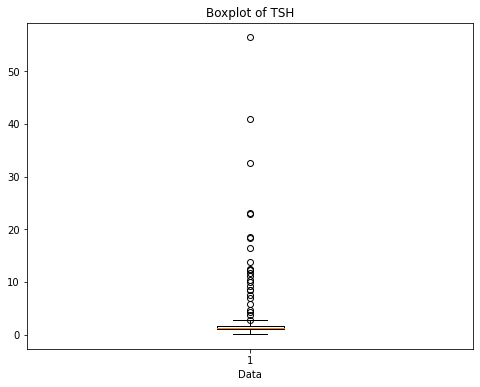

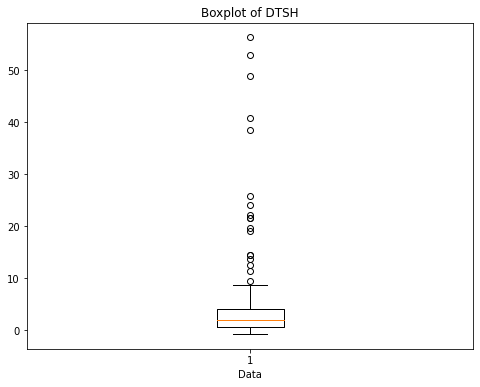

In [75]:
for column in df.columns:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    plt.boxplot(df[column], whis=1.5)  # Adjust the 'whis' parameter to control the display of outliers
    plt.title(f"Boxplot of {column}")
    plt.xlabel('Data')
    plt.show()

In [76]:
lof_model = LocalOutlierFactor(n_neighbors=20, metric='euclidean', contamination=0.1)

outlier_labels = lof_model.fit_predict(df)
print(outlier_labels)
is_outlier = outlier_labels == -1

# indices of outliers
outlier_indices = np.where(is_outlier)

print(f"Number of outliers: {np.sum(is_outlier)}")
print(f"Indices of outliers: {np.where(is_outlier)}")

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1 -1  1  1
 -1  1 -1 -1 -1  1 -1  1  1  1 -1  1 -1 -1  1 -1  1 -1 -1  1  1 -1  1]
Number of outliers: 22
Indices of outliers: (array([ 49, 150, 153, 155, 156, 157, 158, 178, 186, 189, 192, 194, 195,
       196, 198, 202, 204, 205, 207, 209, 210, 213], dtype=int32),)


Import the data and selecting the classifiers names

In [63]:
ds=pd.read_csv('Predictions.csv', skiprows=[1,2])
classifiers = ["kNN", "Random Forest", "Gradient Boosting", "SVM", "Logistic Regression"]

ds.head()

,T3RU,T4,T3,TSH,DTSH,Diagnosis,kNN,Random Forest,Gradient Boosting,SVM,...,Gradient Boosting (1),Gradient Boosting (2),Gradient Boosting (3),SVM (1),SVM (2),SVM (3),Logistic Regression (1),Logistic Regression (2),Logistic Regression (3),Fold
0,0.455696,0.233871,0.132653,0.014210,0.070850,1,1,1,1,1,...,9.999985e-01,7.527598e-07,7.234418e-07,9.326110e-01,0.015575,0.051814,0.662029,0.155146,0.182824,1
1,0.000000,0.713710,1.000000,0.021314,0.014170,2,2,2,2,2,...,9.513848e-07,9.999985e-01,5.790259e-07,6.189848e-08,0.999876,0.000124,0.023689,0.975278,0.001033,1
2,0.569620,0.294355,0.173469,0.035524,0.141700,1,1,1,1,1,...,9.999988e-01,6.118735e-07,5.871533e-07,9.365944e-01,0.010884,0.052521,0.598446,0.166419,0.235135,1
3,0.822785,0.362903,0.153061,0.005329,0.076923,1,1,1,1,1,...,9.999984e-01,8.195516e-07,7.876322e-07,9.874631e-01,0.003938,0.008599,0.653518,0.128955,0.217527,1
4,0.531646,0.536290,0.132653,0.015986,0.050607,1,1,1,1,1,...,9.999987e-01,6.471447e-07,6.219824e-07,7.444292e-01,0.240739,0.014831,0.553976,0.368675,0.077349,1


 Define a function that giving the fold and classifiers names, it returns a dataframe with the evaluation results, showing avarage over class

In [83]:
def valuation(classifiers, fold, dataset):
    columns_name = ["Classifier", "AUC", "Accuracy", "F1", "Precision", "Recall"]
    valdf = pd.DataFrame(columns=columns_name)
    
    if fold == -1:
        foldData = dataset
    else: 
        foldData = dataset[dataset['Fold'] == fold]
        
    y_true = foldData['Diagnosis']

    for clas in classifiers:
        auc_per_class = []
        for class_label in np.unique(y_true):
            r_true = (y_true == class_label)
            prob_pred = foldData[clas + ' (' + str(class_label) + ')']
            auc_score = roc_auc_score(r_true, prob_pred)
            auc_per_class.append(auc_score)
                    
        
        y_pred = foldData[clas]
        
        f1_per_class = f1_score(y_true, y_pred, average=None)
        precision_per_class = precision_score(y_true, y_pred, average=None)
        recall_per_class = recall_score(y_true, y_pred, average=None)
        
        # Calculate overall average for each metric
        num_classes = 3
        
        auc = sum(auc_per_class) / num_classes
        accuracy = accuracy_score(y_true, y_pred)
        f1 = f1_per_class.sum() / num_classes
        precision = precision_per_class.sum() / num_classes
        recall = recall_per_class.sum() / num_classes

        new_row = {'Fold' : int(fold),'Classifier': clas, 'AUC': auc , 'Accuracy': accuracy, 'F1': f1, 'Precision': precision, 'Recall': recall}
        # Append the new row to the DataFrame
        valdf = valdf.append(new_row, ignore_index=True)
        
    return valdf

calculate for each classifier and fold: the avarage accuracy, F1, AUC, PREC, REC

In [84]:
k = ds.Fold.nunique() # count unique elements
evaluate = pd.DataFrame()
for i in range(k):
    val = valuation(classifiers, i+1, ds)
    results = pd.concat([evaluate, val], ignore_index=True)
    evaluate = results
    
print(evaluate.head(50))    

             Classifier       AUC  Accuracy        F1  Precision    Recall  \
0                   kNN  1.000000  1.000000  1.000000   1.000000  1.000000   
1         Random Forest  1.000000  1.000000  1.000000   1.000000  1.000000   
2     Gradient Boosting  1.000000  0.973684  0.974026   0.969697  0.980392   
3                   SVM  1.000000  1.000000  1.000000   1.000000  1.000000   
4   Logistic Regression  1.000000  0.973684  0.972932   0.981481  0.966667   
5                   kNN  1.000000  1.000000  1.000000   1.000000  1.000000   
6         Random Forest  1.000000  0.945946  0.947421   0.939394  0.960784   
7     Gradient Boosting  0.979121  0.918919  0.921566   0.914141  0.941176   
8                   SVM  1.000000  1.000000  1.000000   1.000000  1.000000   
9   Logistic Regression  1.000000  0.918919  0.914149   0.950000  0.900000   
10                  kNN  0.998402  0.972973  0.974026   0.969697  0.980392   
11        Random Forest  0.995570  0.945946  0.947059   0.947059

Calculate mean and confidence interval of the measure for each classifier

In [50]:
def performance(dataset, k, metrics):
    alpha = 0.05
    t_value = stats.t.ppf(1 - alpha/2, k - 1)
    z_score = 1.96
    new_data = pd.DataFrame()
    for clas in classifiers:
        datas = dataset[dataset['Classifier'] == clas]
        
        for metric in metrics:
            mean = np.mean(datas[metric])
            std_dev = np.std(datas[metric], ddof=1)  
            std_error = std_dev / np.sqrt(len(datas[metric]))
            error = t_value * std_error

            # Calculate the confidence interval
            lower_margin = mean - error
            upper_margin = mean + error

            new_row = {'Classifier': clas, 'Metric' : metric, 'Mean': mean, 'lower': lower_margin, 'upper' : upper_margin}
            new_data = new_data.append(new_row, ignore_index=True)
    return new_data

In [67]:
dt = performance(evaluate, k, ["Accuracy","Recall"])
dt.head(20)

,Classifier,Mean,Metric,lower,upper
0,kNN,0.972973,Accuracy,0.914848,1.031098
1,kNN,0.969412,Recall,0.897320,1.041503
2,Random Forest,0.945946,Accuracy,0.883164,1.008728
3,Random Forest,0.942781,Recall,0.865076,1.020485
4,Gradient Boosting,0.940683,Accuracy,0.875993,1.005373
5,Gradient Boosting,0.941359,Recall,0.862725,1.019994
6,SVM,0.978378,Accuracy,0.934623,1.022133
7,SVM,0.973333,Recall,0.919369,1.027298
8,Logistic Regression,0.886629,Accuracy,0.787405,0.985852
9,Logistic Regression,0.864242,Recall,0.748015,0.980470


Verify if the distribution follow the one specify above

In [105]:
dist = 'norm'

for clas in classifiers:
    data = evaluate[evaluate['Classifier'] == clas]['Accuracy']
    
    # Perform the Kolmogorov-Smirnov test
    ks_statistic, p_value = stats.kstest(data, dist)

    # Print the results
    print(f"KS Statistic: {ks_statistic}")
    print(f"P-value: {p_value}")

    # Interpret the results
    alpha = 0.05  # Significance level
    if p_value < alpha:
        print("The sample does not follow the specified theoretical distribution.")
    else:
        print("The sample follows the specified theoretical distribution.")

KS Statistic: 0.8209310082446811
P-value: 0.0003682408270748344
The sample does not follow the specified theoretical distribution.
KS Statistic: 0.8137745594973973
P-value: 0.0004479453646501157
The sample does not follow the specified theoretical distribution.
KS Statistic: 0.8209310082446811
P-value: 0.0003682408270748344
The sample does not follow the specified theoretical distribution.
KS Statistic: 0.8279119214379154
P-value: 0.00030184495624990587
The sample does not follow the specified theoretical distribution.
KS Statistic: 0.783416504684935
P-value: 0.0009537327119449143
The sample does not follow the specified theoretical distribution.


If the above cell results is: "The sample follows the specified theoretical distribution.", procede with anova

In [106]:
anova_df = evaluate.loc[:, ["Classifier", "Fold", "Accuracy"]]
# Perform two-way ANOVA without interaction
model = ols('Accuracy ~ Classifier + Fold', data=anova_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

# Interpret the results based on the table
alpha = 0.05  # Set your desired significance level
if anova_table['PR(>F)']['Classifier'] < alpha:
    print("Factor1 has a significant effect.")
else:
    print("Factor1 does not have a significant effect.")
if anova_table['PR(>F)']['Fold'] < alpha:
    print("Factor2 has a significant effect.")
else:
    print("Factor2 does not have a significant effect.")

              sum_sq    df         F    PR(>F)
Classifier  0.040902   4.0  6.910376  0.001307
Fold        0.001340   1.0  0.905892  0.353159
Residual    0.028115  19.0       NaN       NaN
Factor1 has a significant effect.
Factor2 does not have a significant effect.


Otherwise perform the Kruskal-Wallis test, which does not need the hypothesis of norm distribution

In [52]:
groups = []
for clas in classifiers:
    group = evaluate[evaluate['Classifier'] == clas]['Accuracy'].values.tolist()
    groups.append(group)

print(groups)
# Perform the Kruskal-Wallis test
statistic, p_value = stats.kruskal(*groups)

# Print the results
print("Kruskal-Wallis H-statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # Set your desired significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between groups.")

[[0.9473684210526315, 0.9459459459459459, 1.0, 0.9459459459459459, 0.918918918918919], [0.9473684210526315, 1.0, 1.0, 0.9459459459459459, 0.972972972972973], [0.9736842105263158, 0.972972972972973, 1.0, 0.918918918918919, 0.972972972972973], [0.9736842105263158, 1.0, 1.0, 0.9459459459459459, 0.9459459459459459], [0.868421052631579, 0.8648648648648649, 0.918918918918919, 0.7837837837837838, 0.8918918918918919]]
Kruskal-Wallis H-statistic: 12.604970414201185
P-value: 0.013376304241731298
Reject the null hypothesis: There is a significant difference between groups.


             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------
  Gradient Boosting Logistic Regression  -0.1021  0.001 -0.1663 -0.0379   True
  Gradient Boosting       Random Forest   0.0055    0.9 -0.0587  0.0697  False
  Gradient Boosting                 SVM   0.0054    0.9 -0.0588  0.0696  False
  Gradient Boosting                 kNN  -0.0161    0.9 -0.0803  0.0481  False
Logistic Regression       Random Forest   0.1077  0.001  0.0435  0.1719   True
Logistic Regression                 SVM   0.1075  0.001  0.0433  0.1717   True
Logistic Regression                 kNN   0.0861 0.0055  0.0219  0.1503   True
      Random Forest                 SVM  -0.0001    0.9 -0.0643  0.0641  False
      Random Forest                 kNN  -0.0216  0.832 -0.0858  0.0426  False
                SVM                 kNN  -0.0215 0.8

C:\Users\feder\AppData\Local\Programs\Python\Python36-32\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


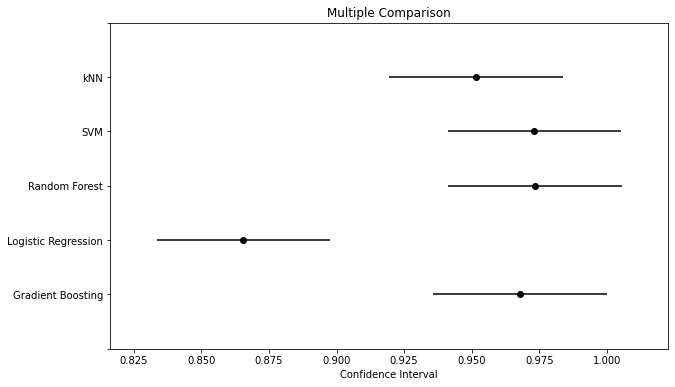

In [53]:
tukey_results = pairwise_tukeyhsd(evaluate['Accuracy'], evaluate['Classifier'])
print(tukey_results)
# Plot Tukey's results

tukey_results.plot_simultaneous()

plt.xlabel('Confidence Interval')
plt.title('Multiple Comparison')
plt.show()

Paired t-test per la cross-validazione

In [81]:
a_SVM = evaluate[evaluate['Classifier'] == 'SVM']['Accuracy'].values
a_RF = evaluate[evaluate['Classifier'] == 'kNN']['Accuracy'].values

di = a_SVM -  a_RF
dm = np.mean(di)
sd = np.sqrt(np.sum((di - dm) ** 2) / (k-1))
t_stat = dm / (sd / np.sqrt(k))

# Calculate the p-value
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=(k-1)))
print(sd)
print(t_stat)
print(p_value)

# Set your significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to determine significance
if p_value < alpha:
    print("The difference between the classifiers is statistically significant.")
else:
    print("The difference between the classifiers is not statistically significant.")

0.012086853932431321
1.0
0.373900966300059
The difference between the classifiers is not statistically significant.


In [82]:
res=pd.read_csv('results.csv', skiprows=[1,2])

res.head()

,T3RU,T4,T3,TSH,DTSH,Diagnosis,SVM,kNN,SVM (1),SVM (2),SVM (3),kNN (1),kNN (2),kNN (3),Fold
0,0.671053,0.346154,0.144330,0.029484,0.087719,1,1,1,0.989557,0.002786,0.007657,1.0,0.0,0.0,1
1,0.763158,0.000000,0.000000,0.552826,0.401754,3,3,3,0.000004,0.000002,0.999994,0.0,0.0,1.0,1
2,0.723684,0.064103,0.154639,0.176904,0.389474,3,3,3,0.001090,0.004846,0.994064,0.0,0.0,1.0,1
3,0.473684,0.205128,0.103093,0.017199,0.112281,1,1,1,0.838675,0.022816,0.138509,1.0,0.0,0.0,1
4,0.565789,0.196581,0.072165,0.014742,0.038596,1,1,1,0.909293,0.012626,0.078081,1.0,0.0,0.0,1


In [80]:
misclassRF = res['Diagnosis'] != res['kNN']
misclassSVM = res['Diagnosis'] != res['SVM']

# Get the indices where the values are different
indices_RF = misclassRF[misclassRF].index
indices_SVM = misclassSVM[misclassSVM].index

# Print the indices
print("Indices with different values for Random Forest:")
for i in indices_RF:
    print('Index  ' + str(i) + ', Diagnosis ' + str(res.loc[i, 'Diagnosis']) + ', Prediction  ' + str(res.loc[i, 'kNN']))

print("Indices with different values for Support Vector Machine:")
for i in indices_SVM:
    print('Index  ' + str(i) + ', Diagnosis ' + str(res.loc[i, 'Diagnosis']) + ', Prediction  ' + str(res.loc[i, 'SVM']))


Indices with different values for Random Forest:
Index  11, Diagnosis 3, Prediction  1
Index  59, Diagnosis 3, Prediction  1
Index  61, Diagnosis 3, Prediction  1
Index  90, Diagnosis 3, Prediction  1
Indices with different values for Support Vector Machine:
Index  61, Diagnosis 3, Prediction  1
Index  78, Diagnosis 2, Prediction  1


In [85]:
metrics = valuation(['kNN', 'SVM'], -1, res)
metrics.head()

,Classifier,AUC,Accuracy,F1,Precision,Recall,Fold
0,kNN,0.943525,0.958333,0.929732,0.981221,0.897436,-1.0
1,SVM,1.000000,0.979167,0.971012,0.990338,0.953526,-1.0
